# Define class

- Our data consists of 20 species and each species has 200 item.
- Converted mp3 file(3.23GB) to wav file(23.4GB)
- By using MFCC, get image or spectrogram of audio file then applied CNN.

In [10]:
classes_dir = ['American_Robbin','Blackbird','Brown-crested_Flycatcher','Chiffchaff','Common_Linnet','Common_Nightingale','Common_wood_pigeon','Common_Cuckoo','Common_Moorhen','Eurasian_Wren','Eurosian_Skylark','FieldFare Turdus','Mistle_Thrush','Redshank','Rook_corvas','Song_Sparrow','Song_Thrush','Sandpiper','Whitethroat','YellowHammer',]

In [11]:
len(classes_dir)

20

- Applied CNN through EfficientNet, LeNet, VGGNet, ResNet and Inception architecture

# Train-test spilt

In [12]:
import os
import numpy as np
import shutil
import pandas as pd


def train_test_split():
    print("########### Train Test Val Script started ###########")
    
    root_dir = 'Project'
    #classes_dir = ['class 1', 'class 2', 'class 3', 'class 4']

    #for name in data_csv['names'].unique()[:10]:
    #    classes_dir.append(name)

    processed_dir = 'Image'

    val_ratio = 0.10
    test_ratio = 0.20

    for cls in classes_dir:
        # Creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"//" + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, test_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])

        train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
        val_FileNames = [src + '//' + name for name in val_FileNames.tolist()]
        test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        # # Creating Train / Val / Test folders (One time use)
        os.makedirs(root_dir + '/train//' + cls)
        os.makedirs(root_dir + '/val//' + cls)
        os.makedirs(root_dir + '/test//' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train//' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val//' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test//' + cls)
       
   

    print("########### Train Test Val Script Ended ###########")

train_test_split()

########### Train Test Val Script started ###########
$$$$$$$ Class Name American_Robbin $$$$$$$
Total images: 198
Training: 138
Validation: 20
Testing: 40
$$$$$$$ Class Name Blackbird $$$$$$$
Total images: 202
Training: 141
Validation: 21
Testing: 40
$$$$$$$ Class Name Brown-crested_Flycatcher $$$$$$$
Total images: 200
Training: 140
Validation: 20
Testing: 40
$$$$$$$ Class Name Chiffchaff $$$$$$$
Total images: 212
Training: 148
Validation: 22
Testing: 42
$$$$$$$ Class Name Common_Linnet $$$$$$$
Total images: 201
Training: 140
Validation: 21
Testing: 40
$$$$$$$ Class Name Common_Nightingale $$$$$$$
Total images: 200
Training: 140
Validation: 20
Testing: 40
$$$$$$$ Class Name Common_wood_pigeon $$$$$$$
Total images: 199
Training: 139
Validation: 20
Testing: 40
$$$$$$$ Class Name Common_Cuckoo $$$$$$$
Total images: 201
Training: 140
Validation: 21
Testing: 40
$$$$$$$ Class Name Common_Moorhen $$$$$$$
Total images: 200
Training: 140
Validation: 20
Testing: 40
$$$$$$$ Class Name Eurasian_W

# Importing Libraries

In [75]:
import efficientnet.tfkeras as efn  # Convolutional Neural Network architecture
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from efficientnet.keras import preprocess_input
#from keras.callbacks.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD ,Adagrad,RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# Fixing image and batch size

In [14]:
IM_SIZE = (224,224,3)
IM_SIZE_NOT3 = (224,224)
BIRDS = classes_dir
DATA_PATH = 'C:/Users/System Administrator/Downloads/Equbal/ML/Project/Project/'
BATCH_SIZE = 15

# Data augmentation and creating train and test and validation of batches

In [15]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    fill_mode="nearest",
)
train_batches = train_datagen.flow_from_directory(
    DATA_PATH + "train",
    classes=BIRDS,
    target_size=IM_SIZE_NOT3,
    class_mode="categorical",
    shuffle=True,
    batch_size=BATCH_SIZE,
)

valid_datagen = ImageDataGenerator( preprocessing_function=preprocess_input)
valid_batches = valid_datagen.flow_from_directory(
    DATA_PATH + "val",
    classes=BIRDS,
    target_size=IM_SIZE_NOT3,
    class_mode="categorical",
    shuffle=False,
    batch_size=BATCH_SIZE,
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(
    DATA_PATH + "test",
    classes=BIRDS,
    target_size=IM_SIZE_NOT3,
    class_mode="categorical",
    shuffle=False,
    batch_size=BATCH_SIZE,
)

Found 2817 images belonging to 20 classes.
Found 412 images belonging to 20 classes.
Found 805 images belonging to 20 classes.


# EfficientNet

- `EfficientNet` is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient.

### Define EfficientNet architecture

In [21]:
# Define CNN's architecture
net = efn.EfficientNetB3(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=IM_SIZE
)
x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(BIRDS), activation="softmax", name="softmax")(x)
net_final = Model(inputs=net.input, outputs=output_layer)
net_final.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)


print(net_final.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 40  1080        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 40  160         ['stem_conv[0][0]']              
                                )                                                           

                                                                                                  
 block2a_dwconv (DepthwiseConv2  (None, 56, 56, 144)  1296       ['block2a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2a_bn (BatchNormalization  (None, 56, 56, 144)  576        ['block2a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2a_activation (Activation  (None, 56, 56, 144)  0          ['block2a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block2a_s

 block2c_se_squeeze (GlobalAver  (None, 192)         0           ['block2c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2c_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block2c_se_squeeze[0][0]']     
                                                                                                  
 block2c_se_reduce (Conv2D)     (None, 1, 1, 8)      1544        ['block2c_se_reshape[0][0]']     
                                                                                                  
 block2c_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block2c_se_reduce[0][0]']      
                                                                                                  
 block2c_se_excite (Multiply)   (None, 56, 56, 192)  0           ['block2c_activation[0][0]',     
          

                                                                  'block3b_se_expand[0][0]']      
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 48)   13824       ['block3b_se_excite[0][0]']      
                                                                                                  
 block3b_project_bn (BatchNorma  (None, 28, 28, 48)  192         ['block3b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3b_drop (FixedDropout)    (None, 28, 28, 48)   0           ['block3b_project_bn[0][0]']     
                                                                                                  
 block3b_add (Add)              (None, 28, 28, 48)   0           ['block3b_drop[0][0]',           
          

 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 14, 14, 576)  55296       ['block4a_project_bn[0][0]']     
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, 14, 14, 576)  2304       ['block4b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4b_expand_activation (Act  (None, 14, 14, 576)  0          ['block4b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4b_d

 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 14, 14, 576)  0          ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv (DepthwiseConv2  (None, 14, 14, 576)  5184       ['block4d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4d_bn (BatchNormalization  (None, 14, 14, 576)  2304       ['block4d_dwconv[0][0]']         
 )                                                                                                
          

 block5a_dwconv (DepthwiseConv2  (None, 14, 14, 576)  14400      ['block5a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 14, 14, 576)  2304       ['block5a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5a_activation (Activation  (None, 14, 14, 576)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 576)         0           ['block5a_activation[0][0]']     
 agePoolin

 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 816)    0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 34)     27778       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 816)    28560       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 816)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
          

                                                                                                  
 block5e_se_expand (Conv2D)     (None, 1, 1, 816)    28560       ['block5e_se_reduce[0][0]']      
                                                                                                  
 block5e_se_excite (Multiply)   (None, 14, 14, 816)  0           ['block5e_activation[0][0]',     
                                                                  'block5e_se_expand[0][0]']      
                                                                                                  
 block5e_project_conv (Conv2D)  (None, 14, 14, 136)  110976      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_project_bn (BatchNorma  (None, 14, 14, 136)  544        ['block5e_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6b_drop (FixedDropout)    (None, 7, 7, 232)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 232)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1392)   322944      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1392)  5568        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block6e_expand_conv (Conv2D)   (None, 7, 7, 1392)   322944      ['block6d_add[0][0]']            
                                                                                                  
 block6e_expand_bn (BatchNormal  (None, 7, 7, 1392)  5568        ['block6e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6e_expand_activation (Act  (None, 7, 7, 1392)  0           ['block6e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6e_dwconv (DepthwiseConv2  (None, 7, 7, 1392)  34800       ['block6e_expand_activation[0][0]
 D)       

                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1392)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 7, 7, 1392)  12528       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 7, 7, 1392)  5568        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_a

__________________________________________________________________________________________________
None


### Train the model through EfficientNet

In [22]:
# Train the model
hist_efficient = net_final.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=30)

Epoch 1/30
188/188 [==============================] - 866s 5s/step - loss: 4.4500 - accuracy: 0.1899 - val_loss: 7.2793 - val_accuracy: 0.2888
Epoch 2/30
188/188 [==============================] - 854s 5s/step - loss: 4.1254 - accuracy: 0.2868 - val_loss: 4.5755 - val_accuracy: 0.3859
Epoch 3/30
188/188 [==============================] - 858s 5s/step - loss: 3.2076 - accuracy: 0.3571 - val_loss: 3.4077 - val_accuracy: 0.4684
Epoch 4/30
188/188 [==============================] - 856s 5s/step - loss: 2.4888 - accuracy: 0.4483 - val_loss: 2.0095 - val_accuracy: 0.5413
Epoch 5/30
188/188 [==============================] - 857s 5s/step - loss: 2.0116 - accuracy: 0.5201 - val_loss: 1.9479 - val_accuracy: 0.5000
Epoch 6/30
188/188 [==============================] - 858s 5s/step - loss: 1.8517 - accuracy: 0.5520 - val_loss: 1.5858 - val_accuracy: 0.6408
Epoch 7/30
188/188 [==============================] - 855s 5s/step - loss: 1.7259 - accuracy: 0.5708 - val_loss: 2.3463 - val_accuracy: 0.6019

### Calculating train accuracy

In [23]:
#Evalute the moddel
loss,acc = net_final.evaluate(train_batches,verbose=2)
print(100*acc)

188/188 - 157s - loss: 0.6229 - accuracy: 0.8601 - 157s/epoch - 832ms/step
86.01348996162415


### Calculating test accuracy

In [24]:
#Evalute the moddel
loss,acc = net_final.evaluate(test_batches,verbose=2)
print(100*acc)

54/54 - 44s - loss: 2.2413 - accuracy: 0.6807 - 44s/epoch - 814ms/step
68.07453632354736


### Plotting train validation loss

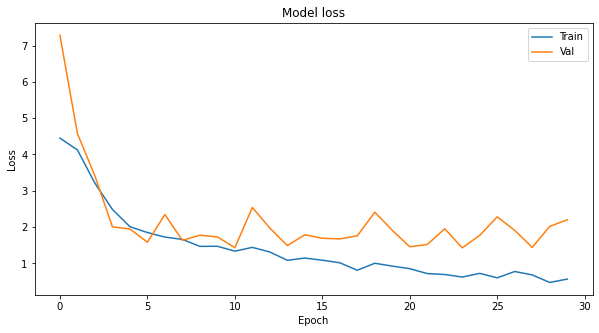

In [25]:
plt.figure(figsize=(10,5))
plt.plot(hist_efficient.history['loss'])
plt.plot(hist_efficient.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

### Plotting train validation accuracy

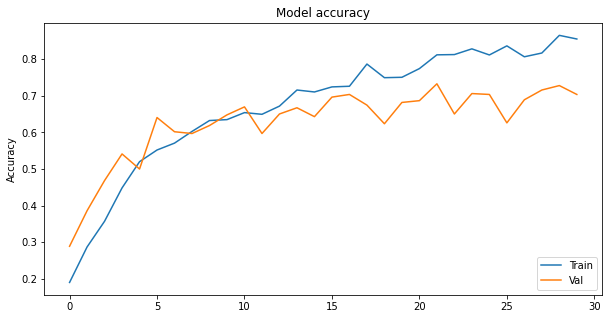

In [26]:
plt.figure(figsize=(10,5))
plt.plot(hist_efficient.history['accuracy'])
plt.plot(hist_efficient.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

In [83]:
predictions_eff = net_final.predict_generator(test_batches)

C:\Users\SYSTEM~1\AppData\Local\Temp/ipykernel_119628/2603066555.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_eff = net_final.predict_generator(test_batches)


In [84]:
predicted_classes_eff = np.argmax(predictions,axis=1)

In [85]:
true_classes_eff = test_batches.classes
class_labels_eff = list(test_batches.class_indices.keys())

### Summary of EfficientNet

In [86]:
report_eff = metrics.classification_report(true_classes,predicted_classes,target_names = class_labels)
print(report_eff)

                          precision    recall  f1-score   support

         American_Robbin       0.84      0.40      0.54        40
               Blackbird       0.41      0.53      0.46        40
Brown-crested_Flycatcher       0.67      0.88      0.76        40
              Chiffchaff       0.65      0.86      0.74        42
           Common_Linnet       0.47      0.85      0.60        40
      Common_Nightingale       0.87      0.85      0.86        40
      Common_wood_pigeon       0.46      0.15      0.23        40
           Common_Cuckoo       0.92      0.30      0.45        40
          Common_Moorhen       0.64      0.62      0.63        40
           Eurasian_Wren       0.67      0.80      0.73        40
        Eurosian_Skylark       1.00      0.76      0.86        41
        FieldFare Turdus       0.59      0.46      0.52        41
           Mistle_Thrush       0.82      0.68      0.74        40
                Redshank       0.63      0.97      0.76        40
         

# Confusion Matrix

In [87]:
confusion_matrix_eff = metrics.confusion_matrix(true_classes_eff , predicted_classes_eff)

### Calculate confusion matrix

Text(0.5, 1.0, 'Confusion matrix for efficientnet')

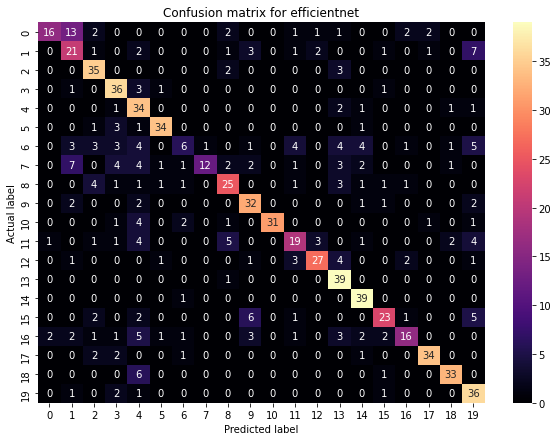

In [89]:
ax = plt.subplots(figsize = (10,7))
sns.heatmap(confusion_matrix_eff,annot = True,cmap='magma')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix for efficientnet')

# LeNet

- `LeNet-5` CNN architecture is made up of 7 layers. The layer composition consists of 3 convolutional layers, 2 subsampling layers and 2 fully connected layers.

### Importing Libraries

In [29]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#import cv2
import os
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

In [30]:
model_lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(224,224,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [31]:
model_lenet.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

In [32]:
x_lenet = model_lenet.output
x_lenet = Flatten()(x_lenet)
x_lenet = Dropout(0.5)(x_lenet)
output_layer = Dense(len(BIRDS), activation="softmax", name="softmax")(x_lenet)
lenet_final = Model(inputs=model_lenet.input, outputs=output_layer)
lenet_final.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)

print(lenet_final.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 112, 112, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 16)      2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 120)       4812

### Train the model through LeNet

In [33]:
# Train the model
hist_lenet = lenet_final.fit_generator(
    train_batches,
    validation_data=valid_batches,
    epochs=30)

Epoch 1/30


C:\Users\SYSTEM~1\AppData\Local\Temp/ipykernel_119628/1002371454.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_lenet = lenet_final.fit_generator(


188/188 [==============================] - 79s 417ms/step - loss: 3.0154 - accuracy: 0.0476 - val_loss: 2.9983 - val_accuracy: 0.0510
Epoch 2/30
188/188 [==============================] - 78s 415ms/step - loss: 3.0054 - accuracy: 0.0557 - val_loss: 2.9967 - val_accuracy: 0.0583
Epoch 3/30
188/188 [==============================] - 77s 410ms/step - loss: 3.0058 - accuracy: 0.0486 - val_loss: 2.9908 - val_accuracy: 0.0461
Epoch 4/30
188/188 [==============================] - 79s 420ms/step - loss: 3.0013 - accuracy: 0.0522 - val_loss: 2.9966 - val_accuracy: 0.0510
Epoch 5/30
188/188 [==============================] - 79s 418ms/step - loss: 2.9988 - accuracy: 0.0586 - val_loss: 2.9941 - val_accuracy: 0.0461
Epoch 6/30
188/188 [==============================] - 77s 411ms/step - loss: 2.9947 - accuracy: 0.0518 - val_loss: 2.9938 - val_accuracy: 0.0461
Epoch 7/30
188/188 [==============================] - 78s 415ms/step - loss: 2.9926 - accuracy: 0.0593 - val_loss: 2.9942 - val_accuracy: 0.0

### Calculate train accuracy

In [95]:
#Evalute the moddel
loss,acc = lenet_final.evaluate(train_batches,verbose=5)
print(100*acc)

5.892793834209442


### Calculate test accuracy

In [94]:
#Evalute the moddel
loss,acc = lenet_final.evaluate(test_batches,verbose=5)
print(100*acc)

5.465838685631752


### Plotting train validation loss

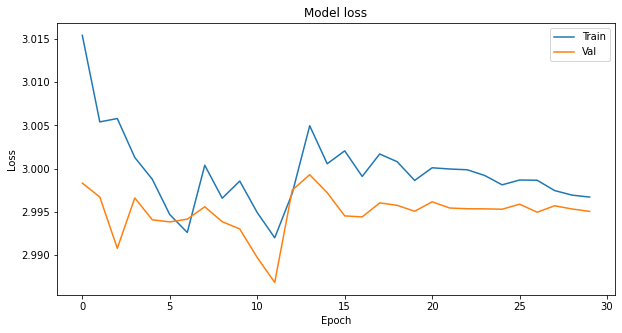

In [36]:
plt.figure(figsize=(10,5))
plt.plot(hist_lenet.history['loss'])
plt.plot(hist_lenet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

### Plotting train and validation accuracy

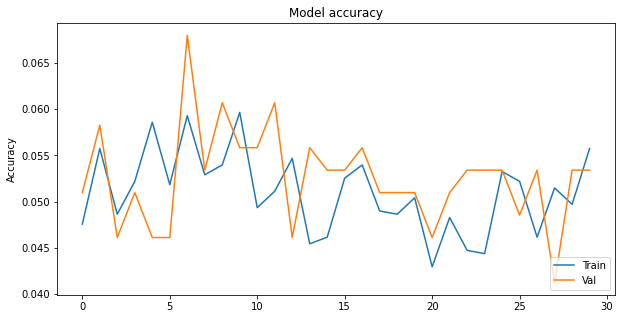

In [37]:
plt.figure(figsize=(10,5))
plt.plot(hist_lenet.history['accuracy'])
plt.plot(hist_lenet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

# VGGNet

- `VGGNet` is an innovative object-recognition model that supports up to 19 layers. Built as a deep CNN, VGG also outperforms baselines on many tasks and datasets outside of ImageNet. VGG is now still one of the most used image-recognition architectures.

### importing Library

In [38]:
from keras.applications.vgg16 import VGG16

### Define VGGNet architecture

In [39]:
# Define CNN's architecture
vggnet = VGG16(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=IM_SIZE
)
x_vggnet = vggnet.output
x_vggnet = Flatten()(x_vggnet)
x_vggnet = Dropout(0.5)(x_vggnet)
output_layer = Dense(len(BIRDS), activation="softmax", name="softmax")(x_vggnet)
vggnet_final = Model(inputs=vggnet.input, outputs=output_layer)
vggnet_final.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)

print(vggnet_final.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### Train the model through VGGNet

In [40]:
# Train the model
hist_vggnet = vggnet_final.fit_generator(
    train_batches,
    validation_data=valid_batches,
    epochs=30)

Epoch 1/30


C:\Users\SYSTEM~1\AppData\Local\Temp/ipykernel_119628/1542989937.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_vggnet = vggnet_final.fit_generator(


188/188 [==============================] - 1142s 6s/step - loss: 3.0457 - accuracy: 0.0508 - val_loss: 2.9957 - val_accuracy: 0.0534
Epoch 2/30
188/188 [==============================] - 1133s 6s/step - loss: 2.9962 - accuracy: 0.0469 - val_loss: 2.9957 - val_accuracy: 0.0534
Epoch 3/30
188/188 [==============================] - 1132s 6s/step - loss: 2.9961 - accuracy: 0.0525 - val_loss: 2.9956 - val_accuracy: 0.0534
Epoch 4/30
188/188 [==============================] - 1123s 6s/step - loss: 2.9961 - accuracy: 0.0490 - val_loss: 2.9956 - val_accuracy: 0.0534
Epoch 5/30
188/188 [==============================] - 1127s 6s/step - loss: 2.9962 - accuracy: 0.0508 - val_loss: 2.9956 - val_accuracy: 0.0534
Epoch 6/30
188/188 [==============================] - 1124s 6s/step - loss: 2.9961 - accuracy: 0.0525 - val_loss: 2.9956 - val_accuracy: 0.0534
Epoch 7/30
188/188 [==============================] - 1125s 6s/step - loss: 2.9962 - accuracy: 0.0525 - val_loss: 2.9956 - val_accuracy: 0.0534
Epo

### Calculate train accuracy

In [41]:
#Evalute the moddel
loss,acc = vggnet_final.evaluate(train_batches,verbose=2)
print(100*acc)

188/188 - 190s - loss: 2.9956 - accuracy: 0.0525 - 190s/epoch - 1s/step
5.253816023468971


### Calculate test accuracy

In [42]:
#Evalute the moddel
loss,acc = vggnet_final.evaluate(test_batches,verbose=2)
print(100*acc)

54/54 - 52s - loss: 2.9957 - accuracy: 0.0522 - 52s/epoch - 970ms/step
5.2173912525177


### plotting train and validation loss

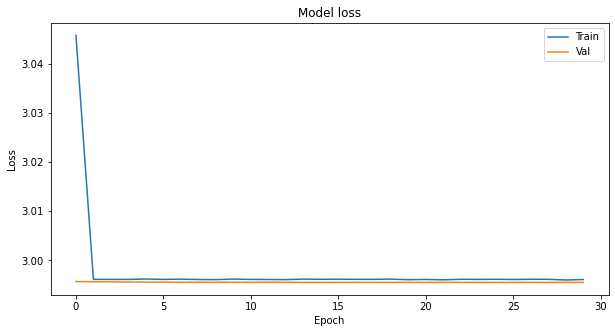

In [43]:
plt.figure(figsize=(10,5))
plt.plot(hist_vggnet.history['loss'])
plt.plot(hist_vggnet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

### Calculating train and validation accuracy

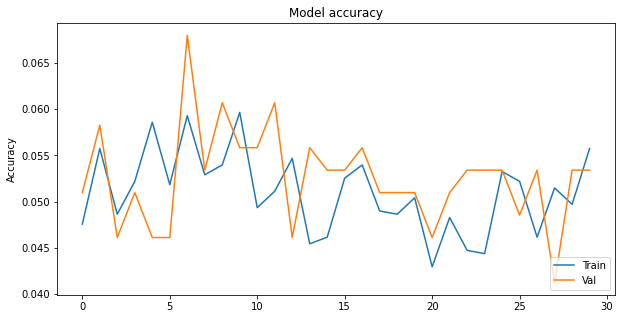

In [44]:
plt.figure(figsize=(10,5))
plt.plot(hist_lenet.history['accuracy'])
plt.plot(hist_lenet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

# ResNet

- `ResNet`, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully.

### Importing Library

In [105]:
from tensorflow.keras.applications import ResNet50

### Define ResNet architecture

In [106]:
# Define CNN's architecture
resnet = ResNet50(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=IM_SIZE
)
x_resnet = resnet.output
x_resnet = Flatten()(x_resnet)
x_resnet = Dropout(0.5)(x_resnet)
output_layer = Dense(len(BIRDS), activation="softmax", name="softmax")(x_resnet)
resnet_final = Model(inputs=resnet.input, outputs=output_layer)
resnet_final.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)

print(resnet_final.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

### Train the model through ResNet

In [107]:
# Train the model
hist_resnet = resnet_final.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=30)

Epoch 1/30
188/188 [==============================] - 756s 4s/step - loss: 7.1329 - accuracy: 0.0806 - val_loss: 2.9934 - val_accuracy: 0.0437
Epoch 2/30
188/188 [==============================] - 751s 4s/step - loss: 5.7456 - accuracy: 0.0941 - val_loss: 2.9957 - val_accuracy: 0.0218
Epoch 3/30
188/188 [==============================] - 750s 4s/step - loss: 4.6624 - accuracy: 0.1154 - val_loss: 2.8214 - val_accuracy: 0.1311
Epoch 4/30
188/188 [==============================] - 750s 4s/step - loss: 5.1266 - accuracy: 0.1168 - val_loss: 54.0407 - val_accuracy: 0.0510
Epoch 5/30
188/188 [==============================] - 750s 4s/step - loss: 5.0994 - accuracy: 0.1250 - val_loss: 3.7899 - val_accuracy: 0.0485
Epoch 6/30
188/188 [==============================] - 750s 4s/step - loss: 5.6029 - accuracy: 0.1292 - val_loss: 382.8882 - val_accuracy: 0.0485
Epoch 7/30
188/188 [==============================] - 749s 4s/step - loss: 5.8586 - accuracy: 0.1452 - val_loss: 4.1220 - val_accuracy: 0.0

### Calculate train accuracy

In [108]:
#Evalute the moddel
loss,acc = resnet_final.evaluate(train_batches,verbose=2)
print(100*acc)

188/188 - 157s - loss: 2.1740 - accuracy: 0.3319 - 157s/epoch - 835ms/step
33.19133818149567


### Calculate test accuracy

In [109]:
#Evalute the moddel
loss,acc = resnet_final.evaluate(test_batches,verbose=2)
print(100*acc)

54/54 - 45s - loss: 2.1920 - accuracy: 0.3230 - 45s/epoch - 831ms/step
32.29813575744629


### Plotting train and validation loss

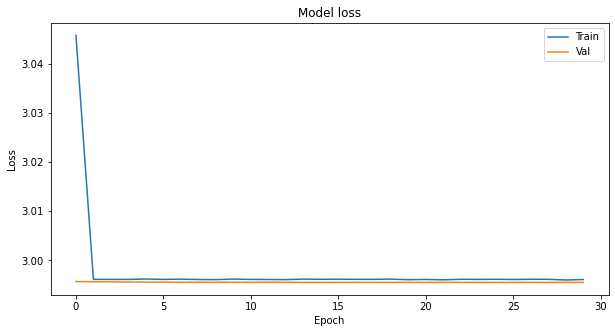

In [110]:
plt.figure(figsize=(10,5))
plt.plot(hist_vggnet.history['loss'])
plt.plot(hist_vggnet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

### Plotting train and validation accuracy

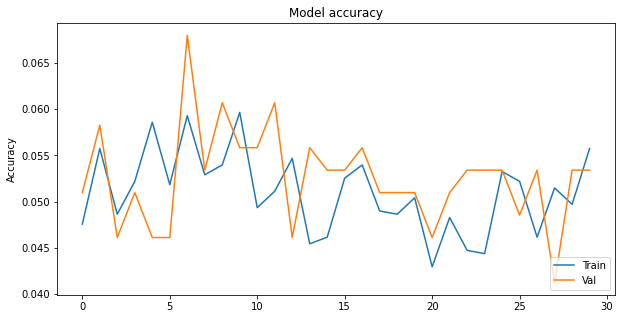

In [111]:
plt.figure(figsize=(10,5))
plt.plot(hist_lenet.history['accuracy'])
plt.plot(hist_lenet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

# Inception

- An `inception` network is a deep neural network with an architectural design that consists of repeating components referred to as Inception modules.

### Importing Library

In [117]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

### Define Inception architecture

In [118]:
# Define CNN's architecture
inception_net = InceptionV3(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=IM_SIZE
)
x_inception = inception_net.output
x_inception = Flatten()(x_inception)
x_inception = Dropout(0.5)(x_inception)
output_layer = Dense(len(BIRDS), activation="softmax", name="softmax")(x_inception)
inception_net_final = Model(inputs=inception_net.input, outputs=output_layer)
inception_net_final.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)

print(inception_net_final.summary())

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_3[0][0]']               
 alization)                     )                                                           

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_8[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_10[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_13[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_14[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_25[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_37 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_37[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_47 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_47[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_48 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_58 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_58[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_64 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_69 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_73 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_77 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_73[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_77[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_79[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_96[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

### Train the model through inception

In [119]:
# Train the model
hist_inception = inception_net_final.fit_generator(
    train_batches,
    validation_data=valid_batches,
    epochs=30)

Epoch 1/30


C:\Users\SYSTEM~1\AppData\Local\Temp/ipykernel_119628/2660193122.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_inception = inception_net_final.fit_generator(


188/188 [==============================] - 525s 3s/step - loss: 4.5008 - accuracy: 0.0532 - val_loss: 1149.1523 - val_accuracy: 0.0316
Epoch 2/30
188/188 [==============================] - 518s 3s/step - loss: 3.8108 - accuracy: 0.0501 - val_loss: 276782.0625 - val_accuracy: 0.0510
Epoch 3/30
188/188 [==============================] - 518s 3s/step - loss: 4.0432 - accuracy: 0.0461 - val_loss: 2490.7563 - val_accuracy: 0.0728
Epoch 4/30
188/188 [==============================] - 519s 3s/step - loss: 3.9232 - accuracy: 0.0493 - val_loss: 6.7729 - val_accuracy: 0.0534
Epoch 5/30
188/188 [==============================] - 518s 3s/step - loss: 3.6263 - accuracy: 0.0547 - val_loss: 2.9968 - val_accuracy: 0.0510
Epoch 6/30
188/188 [==============================] - 518s 3s/step - loss: 3.6790 - accuracy: 0.0806 - val_loss: 116.6111 - val_accuracy: 0.0801
Epoch 7/30
188/188 [==============================] - 520s 3s/step - loss: 3.9348 - accuracy: 0.0980 - val_loss: 2.9247 - val_accuracy: 0.07

### Calculate train accuracy

In [121]:
#Evalute the moddel
loss,acc = inception_net_final.evaluate(train_batches,verbose=5)
print(100*acc)

22.151224315166473


### Calculate test accuracy

In [ ]:
#Evalute the moddel
loss,acc = inception_net_final.evaluate(test_batches,verbose=2)
print(100*acc)

### Plotting train and validation loss

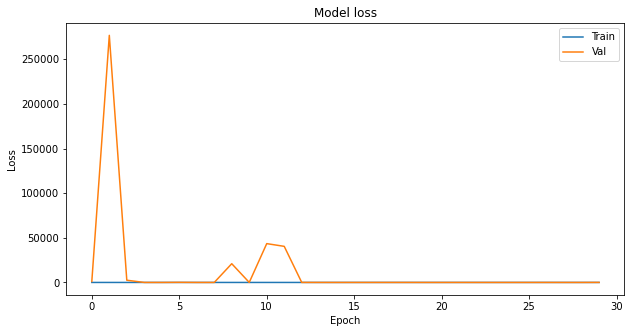

In [130]:
plt.figure(figsize=(10,5))
plt.plot(hist_inception.history['loss'])
plt.plot(hist_inception.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

### Plotting train and validation accuracy

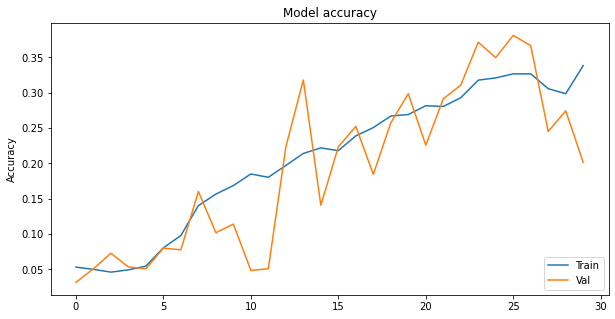

In [129]:
plt.figure(figsize=(10,5))
plt.plot(hist_inception.history['accuracy'])
plt.plot(hist_inception.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.show()